In [7]:
import glob
import os
import json
import pickle as pkl
import yaml

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
from sklearn.metrics import auc, roc_curve
from scipy.special import softmax

import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import clopper_pearson_interval
def get_yerr(num,den):
    return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())

plt.rcParams.update({"font.size": 20})

In [ ]:
%load_ext autoreload
%autoreload 2

In [381]:
! ls tets/

outfiles


In [392]:
with open("tets/outfiles/0-1.pkl", "rb") as f:
    out = pkl.load(f)    
#     out = pkl.load(f)["2017"]    
#     for sample in out: 
#         out = out[sample]["skimmed_events"]["ele"]

In [393]:
out

{'SingleMuon_Run2016G': {'2016': {'lumilist': {(278874, 144, 287544432),
    (278874, 146, 290115350),
    (278820, 396, 707990040),
    (278820, 854, 1569644856),
    (278820, 757, 1388880807),
    (278820, 724, 1326547026),
    (278873, 89, 32861034),
    (278873, 125, 47977278),
    (278820, 232, 413810027),
    (278820, 110, 180964570),
    (278873, 118, 42100663),
    (278874, 147, 291930062),
    (278873, 78, 30127048),
    (278874, 165, 326508830),
    (278820, 395, 705321252),
    (278820, 1533, 2772524522),
    (278874, 180, 353677233),
    (278820, 230, 409968168),
    (278874, 143, 284579131),
    (278874, 146, 290495971),
    (278820, 235, 419959220),
    (278874, 144, 287918637),
    (278873, 88, 32642392),
    (278873, 101, 36136569),
    (278822, 1003, 1741418715),
    (278875, 164, 312088040),
    (278820, 235, 419391858),
    (278820, 229, 408817758),
    (278820, 650, 1183718339),
    (278873, 126, 48250230),
    (278874, 181, 355089073),
    (278820, 228, 407644717),

In [366]:
out

{'TTTo2L2Nu': {'nevents': 47000,
  'sumgenweight': 3392248.0,
  'skimmed_events': {'ele': {'triggers': {'HLT_ele35': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
             True,  True, False,  True,  True,  True,  True,  True,  True,
            False,  True,  True,  True,  True,  True,  True, False, False,
             True,  True,  True,  True,  True, False,  True,  True,  True,
            False,  True,  True,  True,  True, False,  True,  True,  True,
             True,  True,  True]),
     'HLT_ele115': array([ True, False, False,  True, False, False, False, False, False,
            False,  True,  True, False, False, False, False, False, False,
            False,  True, False,  True,  True,  True, False, False, False,
             True, False, False,  True, False, False, False,  True,  True,
             True,  True,  True,  True, False,  True,  True,  True, False,
             True, False, False]),
     'HLT_Photon200': array([False, False, False, Fals

In [322]:
ch = "ele"

hists = hist2.Hist(
    hist2.axis.StrCategory([], name='samples', growth=True),
    hist2.axis.StrCategory([], name='trigger', growth=True),    
    hist2.axis.Regular(10, 0, 2.5, name='lepeta', label=r'Lepton $|\eta|$ [GeV]'),
    hist2.axis.Variable(np.linspace(30, 430, 41), name='leppt', label=r'Lepton $p_T$ [GeV]', overflow=False),
)

sample = "TTTo2L2Nu"

var_dict, trg_dict, weight_dict = {}, {}, {}

for i, file in enumerate(glob.glob(f"../eos/July9_triggerSF_2017/{sample}/outfiles/*")):
    with open(file, "rb") as f:
        out = pkl.load(f)["2017"][sample]["skimmed_events"]["ele"]

    if i==0:
        for key in out["vars"].keys():
            var_dict[key] = []
        for key in out["triggers"].keys():
            trg_dict[key] = []
        for key in out["weights"].keys():
            weight_dict[key] = []

    for key in var_dict:
        var_dict[key] += list(out["vars"][key])

    for key in trg_dict:
        trg_dict[key] += list(out["triggers"][key])

    for key in weight_dict:
        weight_dict[key] += list(out["weights"][key])

for key in var_dict:
    var_dict[key] = np.array(var_dict[key])
for key in trg_dict:
    trg_dict[key] = np.array(trg_dict[key])
for key in weight_dict:
    weight_dict[key] = np.array(weight_dict[key])        

########## build the OR of all triggers
msk_trg = np.zeros(len(var_dict["lep_pt"]), dtype="bool")

for trig in trg_dict:
    msk_trg = msk_trg | trg_dict[trig]

In [323]:
out

{'triggers': {'HLT_ele35': array([ True,  True, False, ...,  True,  True,  True]),
  'HLT_ele115': array([False, False, False, ...,  True, False, False]),
  'HLT_Photon200': array([False, False, False, ..., False, False, False])},
 'vars': {'fj_pt': array([278.  , 271.75, 320.5 , ..., 278.5 , 298.25, 298.5 ]),
  'fj_eta': array([ 2.39941406,  0.21536255,  2.04589844, ..., -1.38574219,
         -0.21365356, -1.57958984]),
  'fj_msoftdrop': array([ 69.6875, 106.5   ,  82.8125, ..., 107.4375, 123.6875,  92.5625]),
  'met_pt': array([ 22.08866501,  76.75235748, 162.69618225, ...,  72.8607254 ,
         105.11645508, 103.88737488]),
  'lep_pt': array([ 86.86205292, 133.8528595 , 122.56997681, ..., 130.68544006,
          87.72232056, 133.99064636]),
  'lep_eta': array([ 2.07519531, -0.10321045,  2.09423828, ..., -1.00708008,
         -0.54968262, -1.35522461])},
 'weights': {'weight_genweight': array([72.69830322, 72.69830322, 72.69830322, ..., 72.69830322,
         72.69830322, 72.69830322

# Electron trigger scale factors

In [92]:
! ls ../eos/July9_triggerSF_2017/

SingleMuon_Run2017B SingleMuon_Run2017D SingleMuon_Run2017F TTToHadronic
SingleMuon_Run2017C SingleMuon_Run2017E TTTo2L2Nu           TTToSemiLeptonic


In [101]:
for sample_label, samples in {
    "TTbar": [
        "TTTo2L2Nu",
        "TTToHadronic",
        "TTToSemiLeptonic",
    ],
    "Data": [
        "SingleMuon_Run2017C",
        "SingleMuon_Run2017D",
        "SingleMuon_Run2017E",
        "SingleMuon_Run2017F",
    ],
}.items():
    print(sample_label, ":", samples)

TTbar : ['TTTo2L2Nu', 'TTToHadronic', 'TTToSemiLeptonic']
Data : ['SingleMuon_Run2017C', 'SingleMuon_Run2017D', 'SingleMuon_Run2017E', 'SingleMuon_Run2017F']


In [302]:
np.linspace(30, 430, 21)

array([ 30.,  50.,  70.,  90., 110., 130., 150., 170., 190., 210., 230.,
       250., 270., 290., 310., 330., 350., 370., 390., 410., 430.])

In [308]:
with open("tets/outfiles/0-1.pkl", "rb") as f:
    out = pkl.load(f)["2017"]["SingleMuon_Run2017B"]["skimmed_events"]["ele"]

In [280]:
ch = "ele"

hists = hist2.Hist(
    hist2.axis.StrCategory([], name='samples', growth=True),
    hist2.axis.StrCategory([], name='trigger', growth=True),    
    hist2.axis.Regular(10, 0, 2.5, name='lepeta', label=r'Lepton $|\eta|$ [GeV]'),
    hist2.axis.Variable(np.linspace(30, 430, 41), name='leppt', label=r'Lepton $p_T$ [GeV]', overflow=False),
)

for sample_label, samples in {
    "TTbar": [
        "TTTo2L2Nu",
        "TTToHadronic",
        "TTToSemiLeptonic",
    ],
    "Data": [
        "SingleMuon_Run2017C",
        "SingleMuon_Run2017D",
        "SingleMuon_Run2017E",
        "SingleMuon_Run2017F",
    ],
}.items():
    
    var_dict, trg_dict, weight_dict = {}, {}, {}
    
    for sample in samples:
        for i, file in enumerate(glob.glob(f"../eos/July9_triggerSF_2017/{sample}/outfiles/*")):
            with open(file, "rb") as f:
                out = pkl.load(f)["2017"][sample]["skimmed_events"]["ele"]

            if i==0:
                for key in out["vars"].keys():
                    var_dict[key] = []
                for key in out["triggers"].keys():
                    trg_dict[key] = []
                for key in out["weights"].keys():
                    weight_dict[key] = []                

            for key in var_dict:
                var_dict[key] += list(out["vars"][key])

            for key in trg_dict:
                trg_dict[key] += list(out["triggers"][key])

            for key in weight_dict:
                weight_dict[key] += list(out["weights"][key])

        for key in var_dict:
            var_dict[key] = np.array(var_dict[key])
        for key in trg_dict:
            trg_dict[key] = np.array(trg_dict[key])
        for key in weight_dict:
            weight_dict[key] = np.array(weight_dict[key])        
            
    # save events before trigger        
    hists.fill(
        samples=sample_label,        
        trigger="before_triggers",
        leppt=var_dict["lep_pt"],
        lepeta=abs(var_dict["lep_eta"]),
    )        
        
    ########## build the OR of all triggers
    msk_trg = np.zeros(len(var_dict["lep_pt"]), dtype="bool")

    for trig in trg_dict:
        msk_trg = msk_trg | trg_dict[trig]

    # save an events before trigger        
    hists.fill(
        samples=sample_label,
        trigger="or_of_triggers",        
        leppt=var_dict["lep_pt"][msk_trg],
        lepeta=abs(var_dict["lep_eta"])[msk_trg],
    )

/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_44699/954225485.py:4: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())
/var/folders/d7/p4v84gls67vdp9_q2rkkvkch0000gn/T/ipykernel_44699/954225485.py:4: RuntimeWarning: invalid value encountered in divide
  return abs(clopper_pearson_interval(num.view(), den.view()) - num.view()/den.view())


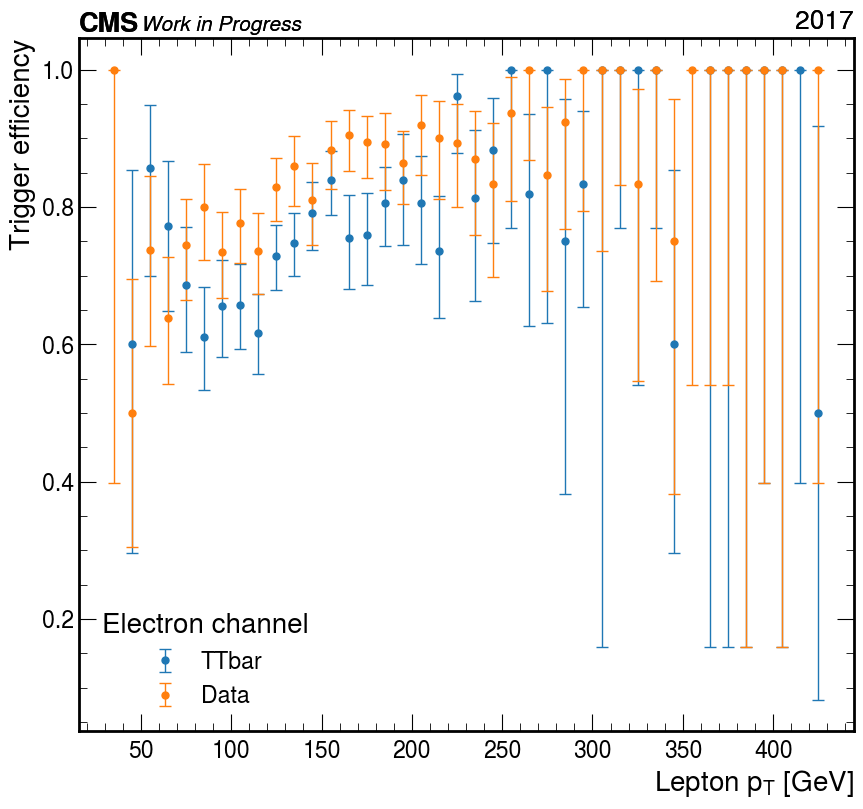

In [281]:
plt.rcParams.update({"font.size": 20})

fig, ax = plt.subplots(figsize=(10,9))

for sample_label in [
    "TTbar",
    "Data",
]:

    den = hists[{"samples": sample_label, "trigger": "before_triggers", 'lepeta': sum}]
    num = hists[{"samples": sample_label, "trigger": "or_of_triggers", 'lepeta': sum}]
    
    hep.histplot(num/den,
                 ax = ax,
                 label=sample_label,
                 histtype='errorbar', 
                 yerr=get_yerr(num, den),
                 capsize=4, 
                 elinewidth=1,
                 flow=None,             
    )

#     ax.set_ylim(0,1)
    ax.legend(title="Electron channel")
    ax.set_ylabel("Trigger efficiency")
    hep.cms.lumitext(
        "2017", ax=ax, fontsize=20
    )
    hep.cms.text("Work in Progress", ax=ax, fontsize=15)

    #     plt.savefig(f"{outdir}/{ch}_trgeff_1d_leppt.pdf")

In [282]:
leppt_bins = hists.axes["leppt"].edges
leppt_bins

array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120., 130.,
       140., 150., 160., 170., 180., 190., 200., 210., 220., 230., 240.,
       250., 260., 270., 280., 290., 300., 310., 320., 330., 340., 350.,
       360., 370., 380., 390., 400., 410., 420., 430.])

In [287]:
hists[{"samples": sample_label, "trigger": "before_triggers"}][:, slice(0,9)].axes["leppt"].edges

array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.])

In [291]:
hists[{"samples": sample_label, "trigger": "before_triggers"}][:, slice(9,17)].axes["leppt"].edges

array([120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [295]:
hists[{"samples": sample_label, "trigger": "before_triggers"}][{"leppt": slice(17,400)}].axes["leppt"].edges

array([200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
       310., 320., 330., 340., 350., 360., 370., 380., 390., 400., 410.,
       420., 430.])

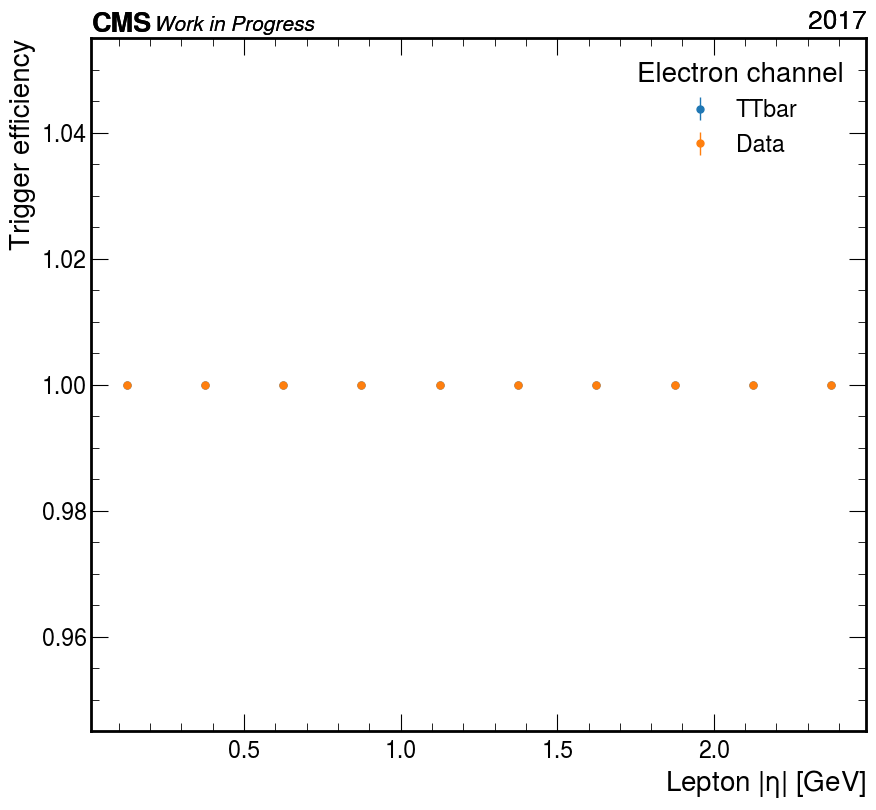

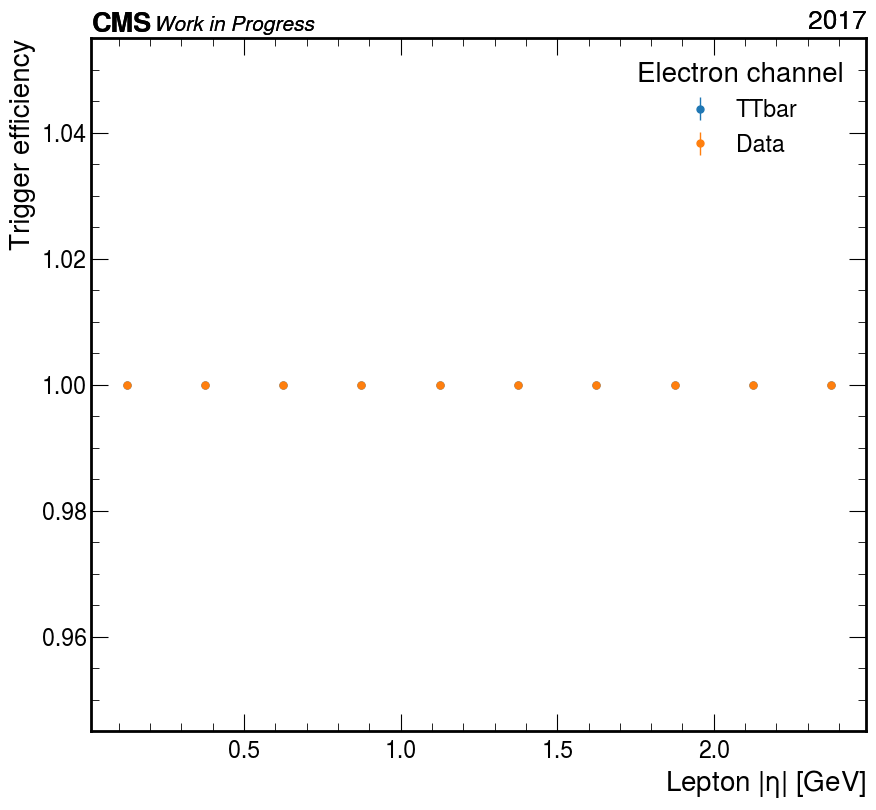

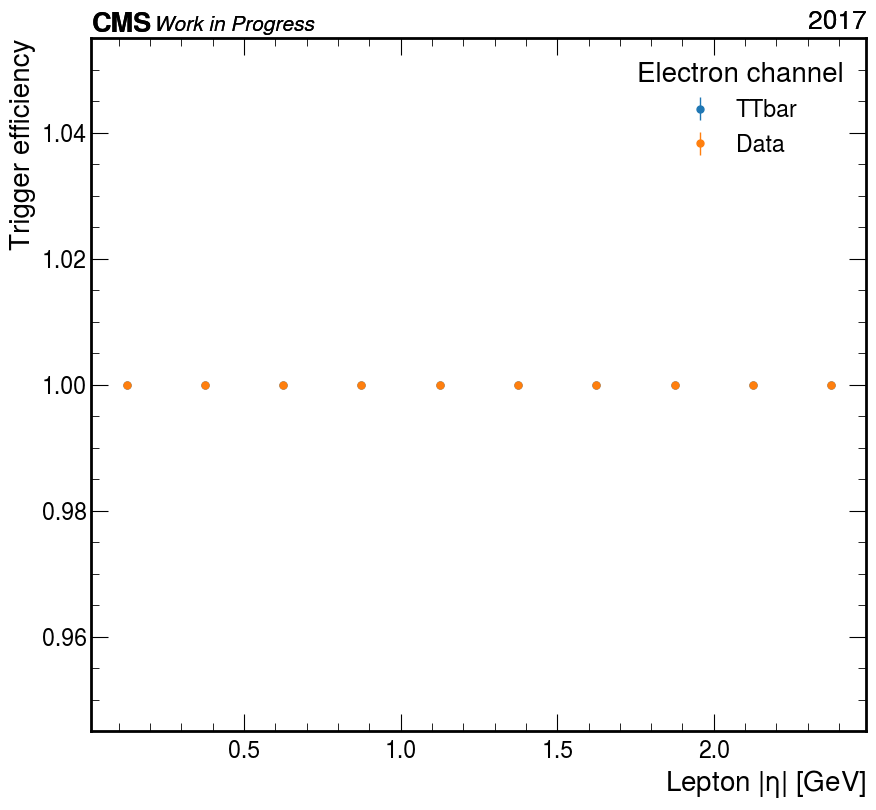

In [301]:
plt.rcParams.update({"font.size": 20})

for sl in [
     slice(0,9),
     slice(9,17),
     slice(17,400),
]:
    fig, ax = plt.subplots(figsize=(10,9))

    for sample_label in [
        "TTbar",
        "Data",
    ]:

        den = hists[{"samples": sample_label, "trigger": "before_triggers", 'leppt': sl}].project("lepeta")
        num = hists[{"samples": sample_label, "trigger": "before_triggers", 'leppt': sl}].project("lepeta")

        hep.histplot(num/den,
                     ax = ax,
                     label=sample_label,
                     histtype='errorbar', 
                     yerr=0*get_yerr(num, den),
#                      capsize=4, 
#                      elinewidth=1,
#                      flow=None,             
        )

    #     ax.set_ylim(0,1)
        ax.legend(title="Electron channel")
        ax.set_ylabel("Trigger efficiency")
        hep.cms.lumitext(
            "2017", ax=ax, fontsize=20
        )
        hep.cms.text("Work in Progress", ax=ax, fontsize=15)

        #     plt.savefig(f"{outdir}/{ch}_trgeff_1d_leppt.pdf")

In [303]:
ch = "ele"

for sample_label, samples in {
    "TTbar": [
        "TTTo2L2Nu",
        "TTToHadronic",
        "TTToSemiLeptonic",
    ],
    "Data": [
        "SingleMuon_Run2017C",
        "SingleMuon_Run2017D",
        "SingleMuon_Run2017E",
        "SingleMuon_Run2017F",
    ],
}.items():
    
    var_dict, trg_dict, weight_dict = {}, {}, {}
    
    for sample in samples:
        for i, file in enumerate(glob.glob(f"../eos/July9_triggerSF_2017/{sample}/outfiles/*")):
            with open(file, "rb") as f:
                out = pkl.load(f)["2017"][sample]["skimmed_events"]["ele"]

            if i==0:
                for key in out["vars"].keys():
                    var_dict[key] = []
                for key in out["triggers"].keys():
                    trg_dict[key] = []
                for key in out["weights"].keys():
                    weight_dict[key] = []                

            for key in var_dict:
                var_dict[key] += list(out["vars"][key])

            for key in trg_dict:
                trg_dict[key] += list(out["triggers"][key])

            for key in weight_dict:
                weight_dict[key] += list(out["weights"][key])

        for key in var_dict:
            var_dict[key] = np.array(var_dict[key])
        for key in trg_dict:
            trg_dict[key] = np.array(trg_dict[key])
        for key in weight_dict:
            weight_dict[key] = np.array(weight_dict[key])

In [ ]:
for ptcut in [
    (0, 120),
    (120, 200),
    (200, 500),
]:

    msk = (var_dict["lep_pt"] > ptcut[0]) & (var_dict["lep_pt"] < ptcut[1])


    hists = hist2.Hist(
        hist2.axis.StrCategory([], name='samples', growth=True),
        hist2.axis.StrCategory([], name='trigger', growth=True),    
        hist2.axis.Regular(10, 0, 2.5, name='lepeta', label=r'Lepton $|\eta|$ [GeV]'),
    )

    fig, ax = plt.subplots(figsize=(10,9))
    # save events before trigger        
    hists.fill(
        samples=sample_label,        
        trigger="before_triggers",
        lepeta=abs(var_dict["lep_eta"][msk]),
    )        

    ########## build the OR of all triggers
    msk_trg = np.zeros(len(var_dict["lep_eta"][msk]), dtype="bool")

    for trig in trg_dict:
        msk_trg = msk_trg | trg_dict[trig][msk]

    # save an events before trigger        
    hists.fill(
        samples=sample_label,
        trigger="or_of_triggers",        
        leppt=var_dict["lep_pt"][msk_trg],
        lepeta=abs(var_dict["lep_eta"])[msk_trg],
    )        

    den = hists[{"samples": sample_label, "trigger": "before_triggers", 'lepeta': sum}]
    num = hists[{"samples": sample_label, "trigger": "or_of_triggers", 'lepeta': sum}]

    hep.histplot(num/den,
                 ax = ax,
                 label=sample_label,
                 histtype='errorbar', 
                 yerr=get_yerr(num, den),
                 capsize=4, 
                 elinewidth=1,
                 flow=None,             
    )

#     ax.set_ylim(0,1)
    ax.legend(title="Electron channel")
    ax.set_ylabel("Trigger efficiency")
    hep.cms.lumitext(
        "2017", ax=ax, fontsize=20
    )
    hep.cms.text("Work in Progress", ax=ax, fontsize=15)

    #     plt.savefig(f"{outdir}/{ch}_trgeff_1d_leppt.pdf")